<a href="https://colab.research.google.com/github/Hiteshkumar231801059/AD23532_PODS/blob/main/ex-6(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


type
Movie      6131
TV Show    2676
Name: count, dtype: int64


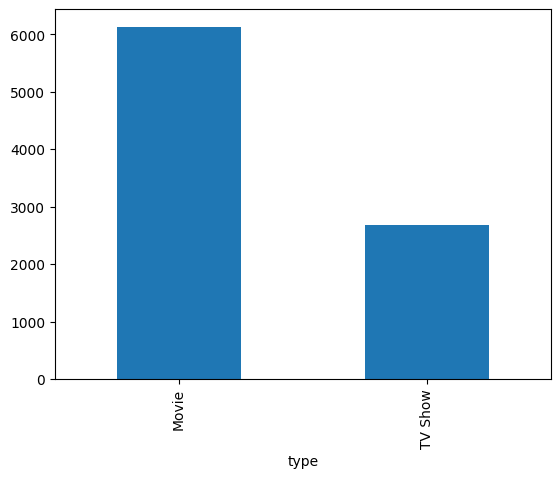

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


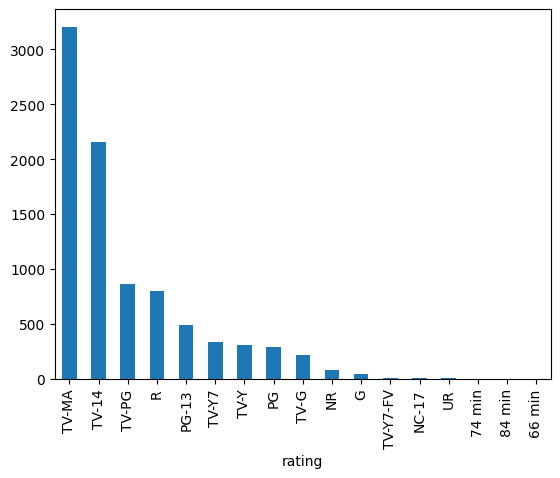

country
United States     3689
India             1046
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: count, dtype: int64


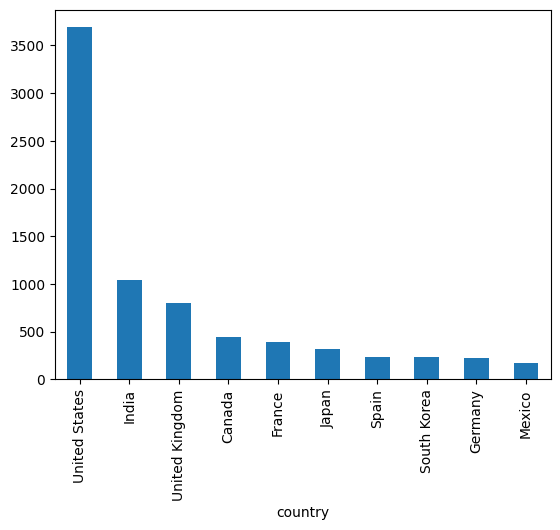

In [4]:
print(df['type'].value_counts())
df['type'].value_counts().plot(kind='bar')
plt.show()

print(df['rating'].value_counts())
df['rating'].value_counts().plot(kind='bar')
plt.show()

country_counts = df['country'].dropna().str.split(', ').explode().value_counts()
print(country_counts.head(10))
country_counts.head(10).plot(kind='bar')
plt.show()

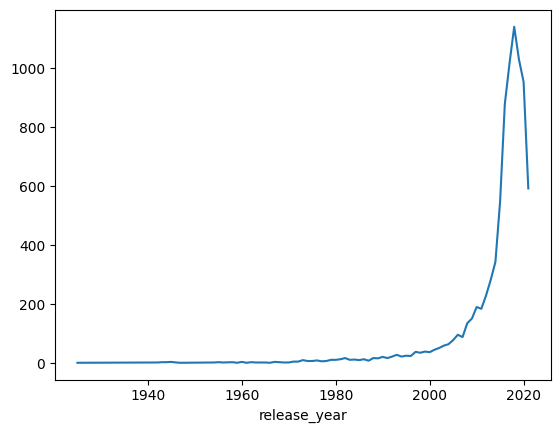

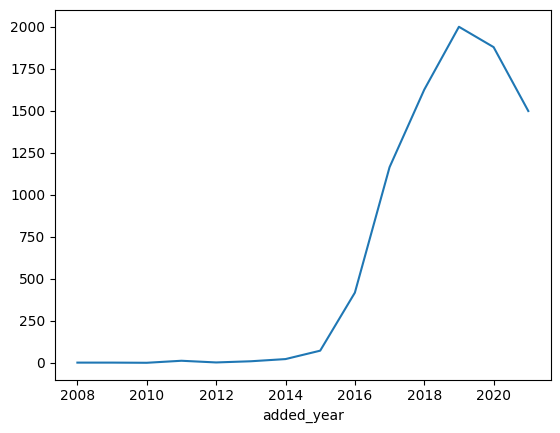

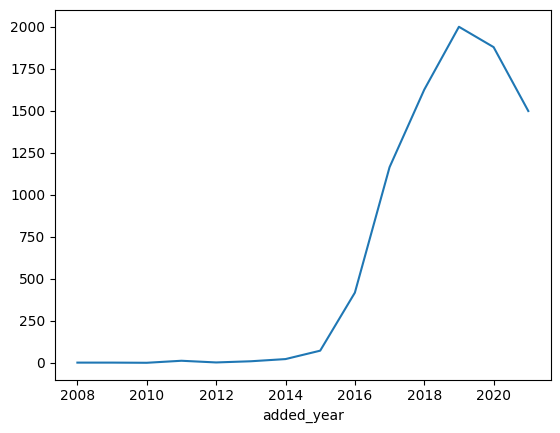

In [8]:
df['release_year'].value_counts().sort_index().plot()
plt.show()

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df.dropna(subset=['date_added'])
df['added_year'] = df['date_added'].dt.year
df['added_year'].value_counts().sort_index().plot()
plt.show()

df.groupby('added_year').size().plot()
plt.show()


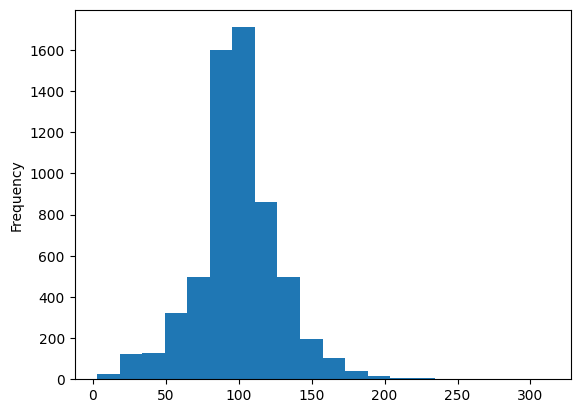

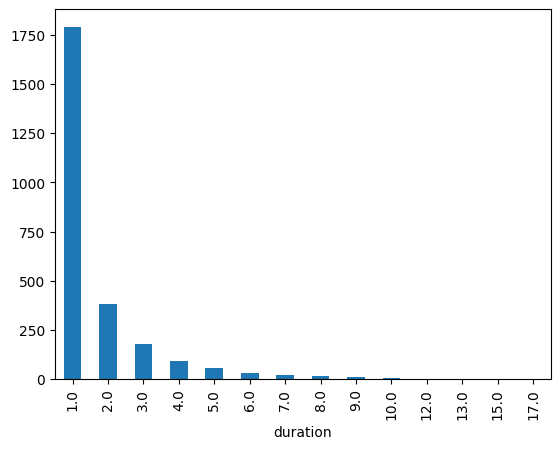

In [9]:
movie_durations = df[df['type']=='Movie']['duration'].str.replace(' min','').astype(float)
movie_durations.plot(kind='hist', bins=20)
plt.show()

tv_seasons = df[df['type']=='TV Show']['duration'].str.replace(' Seasons','').str.replace(' Season','').astype(float)
tv_seasons.value_counts().sort_index().plot(kind='bar')
plt.show()

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1328
Documentaries                869
Action & Adventure           859
Independent Movies           756
TV Dramas                    739
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


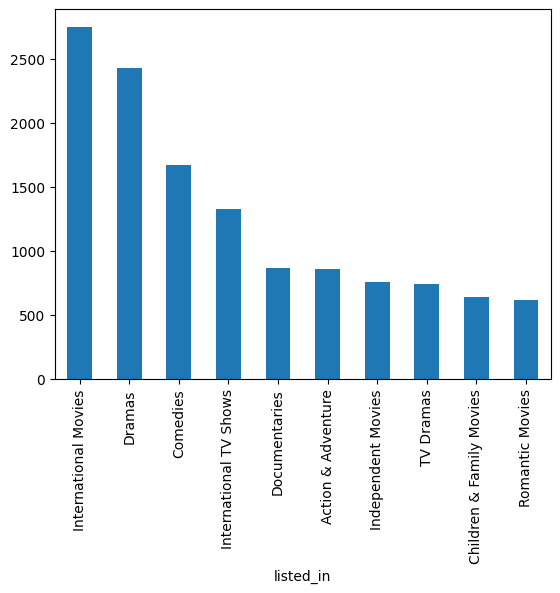

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Martin Scorsese        12
Youssef Chahine        12
Name: count, dtype: int64


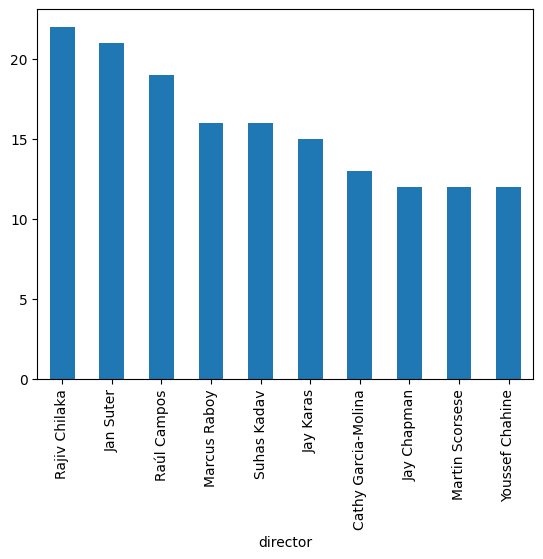

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Rupa Bhimani        31
Takahiro Sakurai    31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64


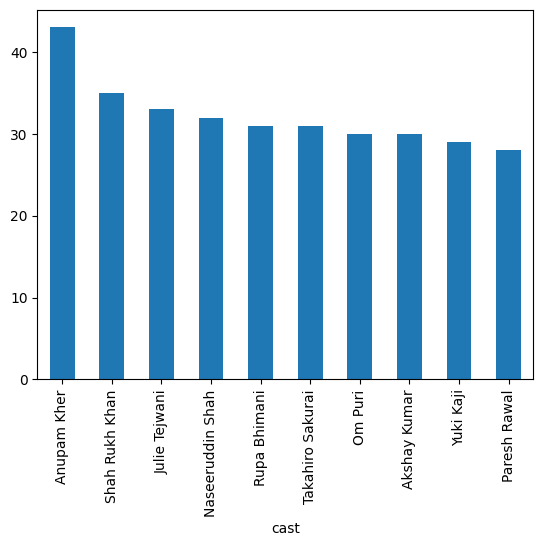

In [10]:
genres = dflisted_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)
print(top_genres)
top_genres.plot(kind='bar')
plt.show()

directors = dfdfrector'].dropna().str.split(', ').explode().value_counts()
print(directors.head(10))
directors.head(10).plot(kind='bar')
plt.show()

actors = df['cast'].dropna().str.split(', ').explode().value_counts()
print(actors.head(10))
actors.head(10).plot(kind='bar')
plt.show()

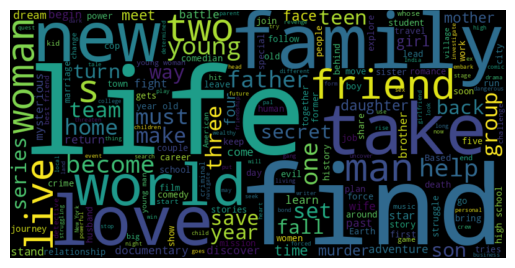

In [11]:
descriptions = ' '.join(df['description'].dropna().values)
wordcloud = WordCloud(width=800, height=400).generate(descriptions)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

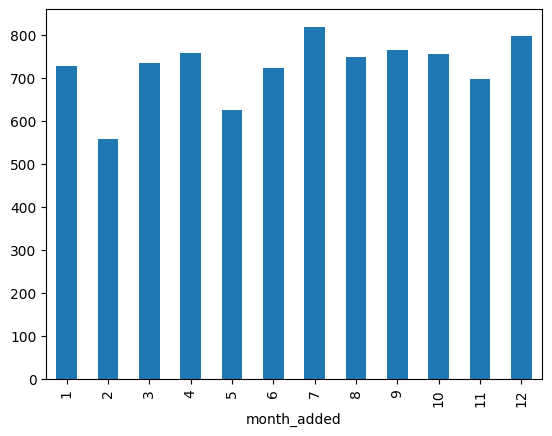

In [13]:
df['month_added'] = df['date_added'].dt.month
df['month_added'].value_counts().sort_index().plot(kind='bar')
plt.show()

             Movies  TV Shows
country                      
                1.0       1.0
Afghanistan     1.0       0.0
Albania         1.0       0.0
Algeria         3.0       0.0
Angola          1.0       0.0
Argentina      71.0      20.0
Armenia         1.0       0.0
Australia      94.0      63.0
Austria        11.0       1.0
Azerbaijan      0.0       1.0


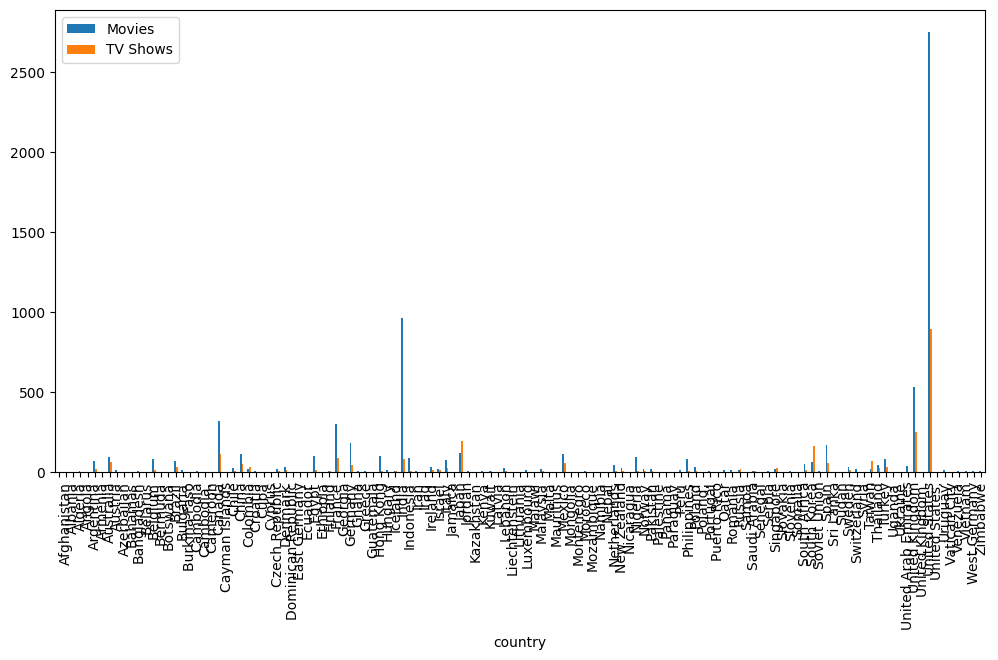

In [15]:
country_movies = df[df['type']=='Movie']['country'].dropna().str.split(', ').explode().value_counts()
country_tv = df[df['type']=='TV Show']['country'].dropna().str.split(', ').explode().value_counts()
df_country = pd.dfFrame({'Movies': country_movies, 'TV Shows': country_tv}).fillna(0)
print(df_country.head(10))
df_country.plot(kind='bar', figsize=(12,6))
plt.show()

In [16]:
movie_ratings = df[df['type']=='Movie']['rating'].value_counts()
tv_ratings = df[df['type']=='TV Show']['rating'].value_counts()
df_ratings = pd.dfFrame({'Movies': movie_ratings, 'TV Shows': tv_ratings}).fillna(0)
print(df_ratings)

          Movies  TV Shows
rating                    
66 min         1       0.0
74 min         1       0.0
84 min         1       0.0
G             41       0.0
NC-17          3       0.0
NR            75       3.0
PG           287       0.0
PG-13        490       0.0
R            797       2.0
TV-14       1427     706.0
TV-G         126      86.0
TV-MA       2062    1121.0
TV-PG        540     298.0
TV-Y         131     169.0
TV-Y7        139     191.0
TV-Y7-FV       5       0.0
UR             3       0.0


In [19]:
oldest = df.sort_values('release_year').head(1)
newest = df.sort_values('release_year', ascending=False).head(1)
print('Oldest Title:', oldest[['title', 'release_year']])
print('Newest Title:', newest[['title', 'release_year']])

Oldest Title:                                   title  release_year
4250  Pioneers: First Women Filmmakers*          1925
Newest Title:            title  release_year
1  Blood & Water          2021


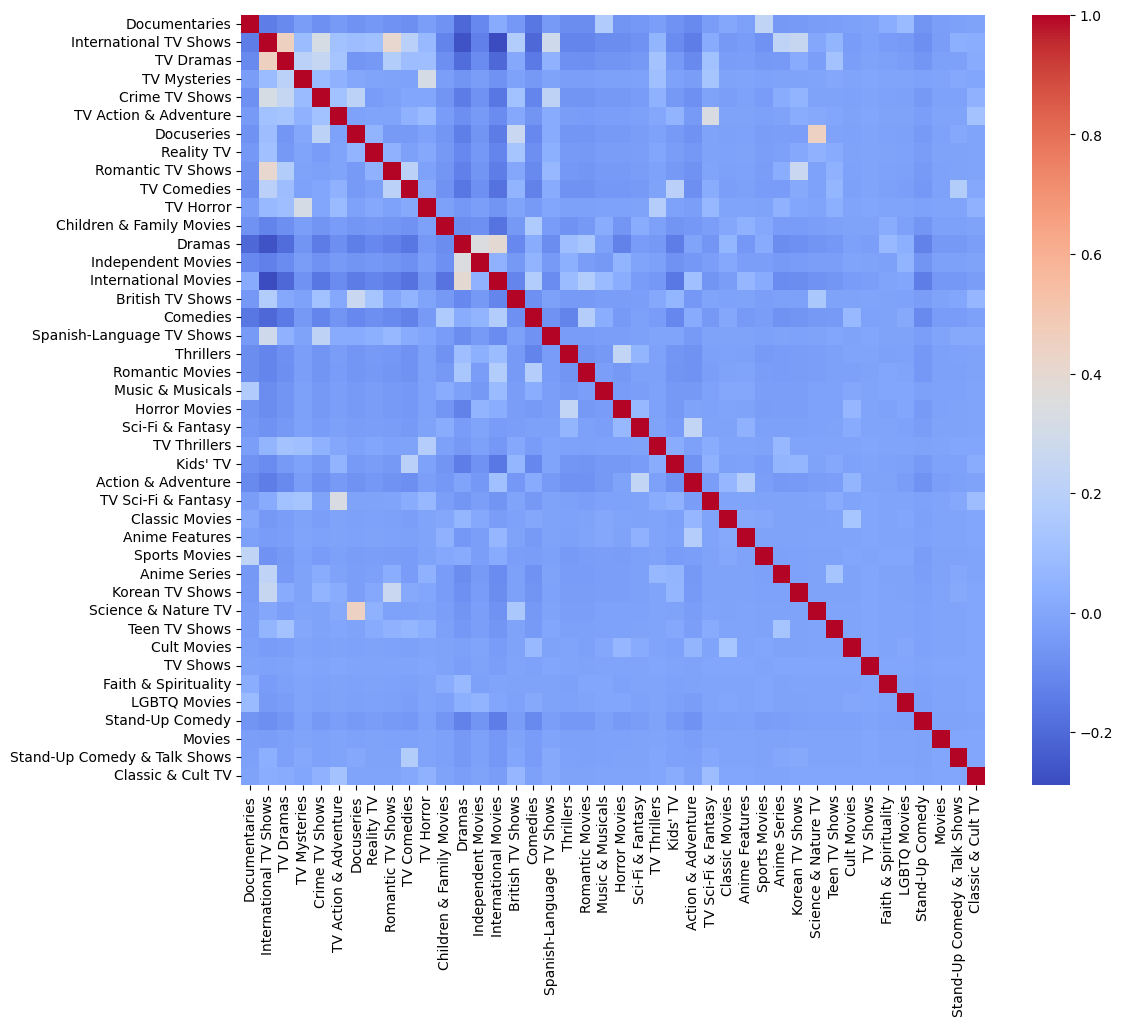

In [20]:
unique_genres = genres.unique()
genre_matrix = pd.DataFrame()
for genre in unique_genres:
    genre_matrix[genre] = df['listed_in'].apply(lambda x: genre in x.split(', ')).astype(int)
corr = genre_matrix.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.show()
